# Exercise 1

## Part 2)


So we consider now the matrix

\begin{equation}
\begin{pmatrix}
1+i & i & 2 \\
-3 & 2+i & i \\
1 & i & 6 
\end{pmatrix}
\end{equation}

We want to draw the corresponding Gerschgöring disks and localize their eigenvalues of $A$.

For this the **Theorem of Gerschgöring** states that the eigenvalues of a matrix $A$ are contained in the union of the disks

\begin{equation}
D_i = \{ \mu \in \mathbb{C} : |\mu - a_{ii}| \leq \sum_{j \neq i} |a_{ij}| \}
\end{equation}


Centers of the circles are at:  [1.+1.j 2.+1.j 6.+0.j]
Radii of the circles are:  [3. 4. 2.]


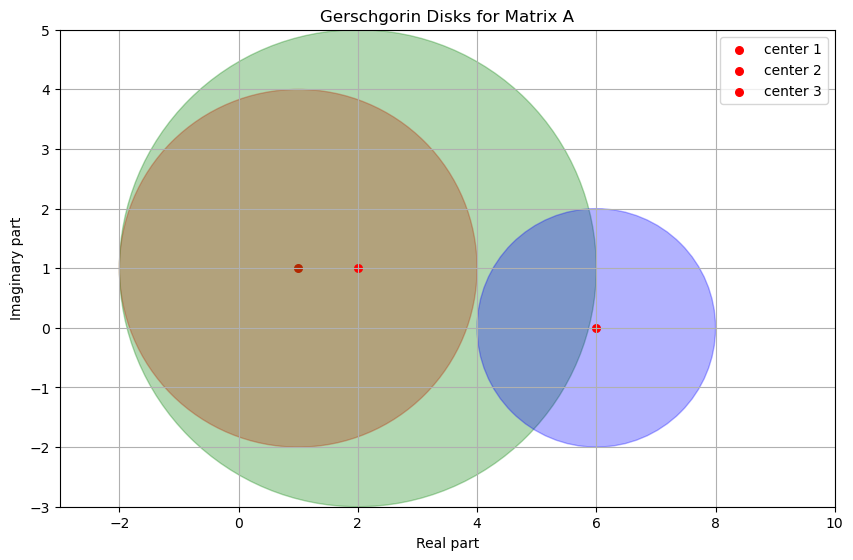

In [9]:
import numpy as np
import matplotlib.pyplot as plt


A = np.array([
    [1+1j, 1j, 2],
    [-3, 2+1j, 1],
    [1, 1j, 6]
])

# Now extract the diagonal entries
centers = np.diag(A)
print("Centers of the circles are at: ", centers)

# The radii ar the sum of absolute values of the off-diagonal entries per row
radii = np.array([np.sum(np.abs(np.delete(A[i],i))) for i in range(A.shape[0])])
print("Radii of the circles are: ", radii)

# Now we plot this disks

fix,ax = plt.subplots(figsize=(10,8))


colors = ['red', 'green', 'blue']
for i in range(3):
    center = centers[i]
    radius = radii[i]
    circle = plt.Circle((center.real, center.imag), radius, color=colors[i], alpha=0.3)
    ax.add_patch(circle)
    plt.scatter(center.real, center.imag,color='red',s=30,label=f"center {i+1}")

ax.set_xlim(-3,10)
ax.set_ylim(-3,5)
ax.set_xlabel("Real part")
ax.set_ylabel("Imaginary part")
plt.title("Gerschgorin Disks for Matrix A")
ax.grid(True)
ax.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


## Part 3)

We now plot the Gerschgöring disks for the Transpose of the matrix $A^T$.

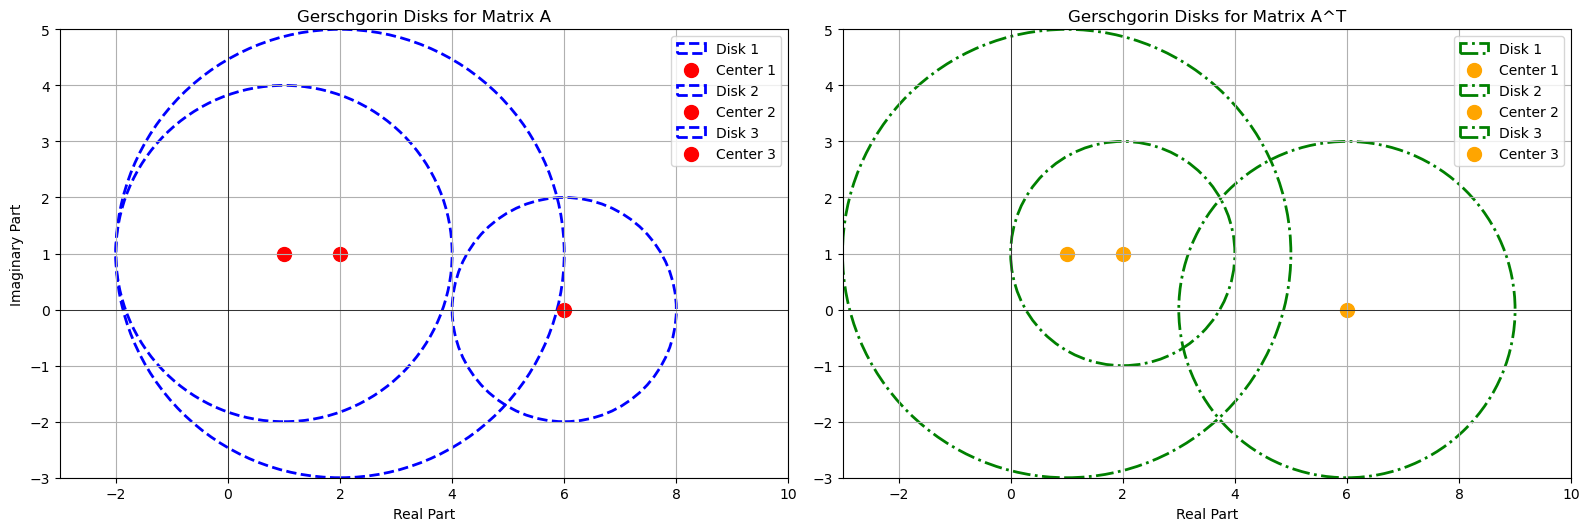

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the matrix A
A = np.array([
    [1 + 1j, 1j, 2],
    [-3, 2 + 1j, 1],
    [1, 1j, 6]
])
A_transpose = A.T 

# Function to compute disk for a given matrix
def compute_disks(matrix):
    centers = np.diag(matrix)
    radii = np.array([np.sum(np.abs(np.delete(matrix[i], i))) for i in range(3)])
    return centers, radii

# Compute disks for A and A^T
centers_A, radii_A = compute_disks(A)
centers_AT, radii_AT = compute_disks(A_transpose)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))


for i in range(3):
    center = centers_A[i]
    radius = radii_A[i]
    circle = plt.Circle((center.real, center.imag), radius, fill=False, edgecolor='blue', linestyle='--', linewidth=2, label=f'Disk {i+1}')
    ax1.add_patch(circle)
    ax1.scatter(center.real, center.imag, color='red', s=100, label=f'Center {i+1}')
ax1.set_xlim(-3, 10)
ax1.set_ylim(-3, 5)
ax1.set_title('Gerschgorin Disks for Matrix A')
ax1.set_xlabel('Real Part')
ax1.set_ylabel('Imaginary Part')
ax1.grid(True)
ax1.axhline(0, color='black', linewidth=0.5)
ax1.axvline(0, color='black', linewidth=0.5)
ax1.legend()
ax1.set_aspect('equal')


for i in range(3):
    center = centers_AT[i]
    radius = radii_AT[i]
    circle = plt.Circle((center.real, center.imag), radius, fill=False, edgecolor='green', linestyle='-.', linewidth=2, label=f'Disk {i+1}')
    ax2.add_patch(circle)
    ax2.scatter(center.real, center.imag, color='orange', s=100, label=f'Center {i+1}')
ax2.set_xlim(-3, 10)
ax2.set_ylim(-3, 5)
ax2.set_title('Gerschgorin Disks for Matrix A^T')
ax2.set_xlabel('Real Part')
ax2.grid(True)
ax2.axhline(0, color='black', linewidth=0.5)
ax2.axvline(0, color='black', linewidth=0.5)
ax2.legend()
ax2.set_aspect('equal')

plt.tight_layout()
plt.show()

# Exercise 3

## Part 3)

Implementation of the $QR$ decomposition in python to iteratively compute $A_k= R_{K-1}Q_{k-1}$ starting from $A_0 = A$.

In [12]:
def qr_decomp(A):
    """
    Performs the QR decompositon of a matrix A using the Gramm-Smith Process
    """
    m,n = A.shape
    rank = np.linalg.matrix_rank(A)

    if rank < n:
        raise ValueError("Matrix A is rank deficient")
    Q = np.zeros((m,n), dtype=A.dtype)

    for i,column in enumerate(A.T):
        Q[:,i] = column

        # we have to substract the projection of the previous columns
        for prev in Q.T[:i]:
            Q[:,i] -= (prev @ column) /(prev @ prev) * prev # projection
        # Now we have to normalize each column
    Q /= np.linalg.norm(Q, axis=0)
    R = Q.T @ A
    return Q,R

def test_orthonormality(A):
    """
    Basic function to test the orthonormality of a matrix
    """
    Q, _ = qr_decomp(A)
    I = Q.T @ Q

    assert len(set(I.shape)) == 1, "computed matrix should be square"
    assert np.allclose(I, np.eye(I.shape[0])), "computed matrix should be identity"

def test_upper_triangular(A):
    _, R = qr_decomp(A)

    assert len(set(R.shape)) == 1, "computed matrix should be square"

    for i, row in enumerate(R):
        for j, value in enumerate(row):
            assert np.allclose(row[:i],0), f"computed upper triangular matrix should be upper triangular row {i} isn't correct"

def test_multiplication(A):
    Q, R = qr_decomp(A)
    assert np.allclose(Q @ R, A), "Q @ R should be equal to A"


In [14]:
theta = np.pi / 4  
A = np.array([
    [np.cos(theta), np.sin(theta)],
    [np.sin(theta), 0]
])
# Perform QR decomposition
Q, R = qr_decomp(A)
# Test orthonormality of Q
test_orthonormality(A)
# Test upper triangularity of R
test_upper_triangular(A)
# Test multiplication of Q and R
test_multiplication(A)
print("All tests passed!")
print("Q:\n", Q)
print("R:\n", R)

All tests passed!
Q:
 [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
R:
 [[1.  0.5]
 [0.  0.5]]


## Part 4)

Observe the convergence of the sequence $A_k$ to the diagonal matrix of eigenvalues of $A$. This should validate your algorithm if you recover the results from 1)



In [36]:
def qr_algorithm(A,max_iter=1000, tol=1e-10):
    """
    Computes the eigenvalues of a matrix A using the QR algorithm
    """
    A_k = A.copy()
    n = A.shape[0]
    iter = 0
    for k in range(max_iter):
        iter += 1
        Q,R = qr_decomp(A_k)
        A_k = R @ Q
        
        # Convergence = off-diagonal elements are small
        off_diag = np.sum(np.abs(A_k - np.diag(np.diag(A_k))))
        if off_diag < tol:
            break

    eigenvalues = np.diag(A_k)
    return eigenvalues, A_k, iter



By question 1) we know that the eigenvalues of $A$ are given by the following formula:

\begin{equation}
\lambda = \frac{cos(\theta) ± \sqrt{4-3cos^2(\theta)}}{2}
\end{equation}

For testing if $\theta = \pi/4$

$\lambda = \frac{\sqrt{2} ± \sqrt{10}}{4}$

In [37]:
theta = np.pi / 4  # Example: θ = 45°
A = np.array([
    [np.cos(theta), np.sin(theta)],
    [np.sin(theta), 0]
])

eigenvalues, A_final, iter = qr_algorithm(A)
print("Computed eigenvalues:", eigenvalues)
print("Final A_k (diagonalized):\n", A_final)

print("--------------------- Expected eigenvalues ---------------------")
lambda_1 = (np.sqrt(2) + np.sqrt(10))/4
lambda_2 = (np.sqrt(2) - np.sqrt(10))/4
print("Eigenvalue 1:", lambda_1)
print("Eigenvalue 2:", lambda_2)

Computed eigenvalues: [ 1.14412281 -0.43701602]
Final A_k (diagonalized):
 [[ 1.14412281e+00  3.47217106e-11]
 [ 3.47216497e-11 -4.37016024e-01]]
--------------------- Expected eigenvalues ---------------------
Eigenvalue 1: 1.1441228056353687
Eigenvalue 2: -0.4370160244488211


Looks good :)


## Part 5) 

We should now investigate how different values of theta affect the convergence of the qr algorithm.


---------------------
Eigenvalues for θ=0.7853981633974483: [ 1.14412281 -0.43701602]
Final A_k (diagonalized) for θ=0.7853981633974483:
 [[ 1.14412281e+00  3.47217106e-11]
 [ 3.47216497e-11 -4.37016024e-01]]
Number of iterations for θ=0.7853981633974483: 25
---------------------
---------------------
Eigenvalues for θ=1.0471975511965976: [ 1.15138782 -0.65138782]
Final A_k (diagonalized) for θ=1.0471975511965976:
 [[ 1.15138782e+00  3.12482147e-11]
 [ 3.12481840e-11 -6.51387819e-01]]
Number of iterations for θ=1.0471975511965976: 43
---------------------
---------------------
Eigenvalues for θ=0.5235987755982988: [ 1.09445053 -0.22842513]
Final A_k (diagonalized) for θ=0.5235987755982988:
 [[ 1.09445053e+00  3.75412276e-11]
 [ 3.75412691e-11 -2.28425126e-01]]
Number of iterations for θ=0.5235987755982988: 15
---------------------
---------------------
Eigenvalues for θ=1.5707963267948966: [ 6.12935723e-14 -6.12323400e-14]
Final A_k (diagonalized) for θ=1.5707963267948966:
 [[ 6.129357

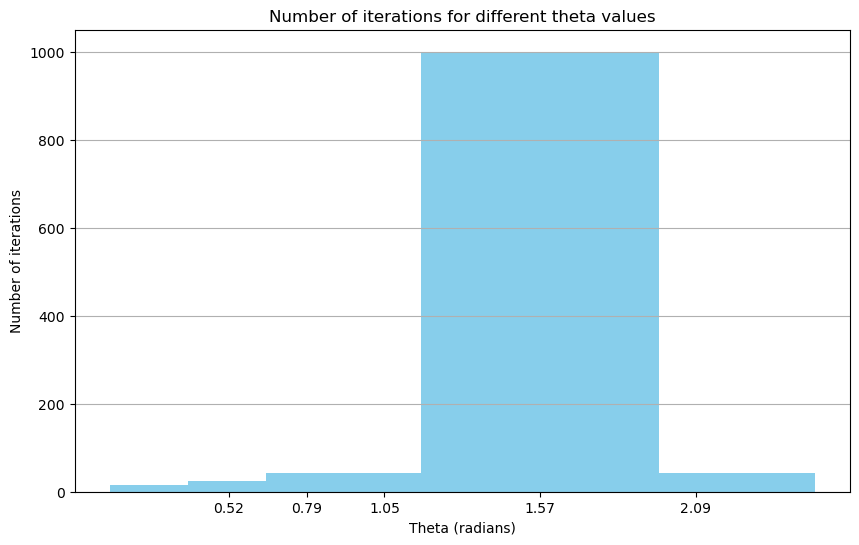

In [41]:
theta_vals = [np.pi/4, np.pi/3, np.pi/6, np.pi/2, 2*np.pi/3] # Problem is for 0, and pi the matrix is rank deficient

eigenvalues_list = []
A_final_list = []
iterations_list = []

for theta in theta_vals:
    A = np.array([
        [np.cos(theta), np.sin(theta)],
        [np.sin(theta), 0]
    ])
    eigenvalues, A_final, iter = qr_algorithm(A)
    eigenvalues_list.append(eigenvalues)
    A_final_list.append(A_final)
    iterations_list.append(iter)
    print("---------------------")
    print(f"Eigenvalues for θ={theta}: {eigenvalues}")
    print(f"Final A_k (diagonalized) for θ={theta}:\n", A_final)
    print(f"Number of iterations for θ={theta}: {iter}")
    print("---------------------")

# Plot the iterations vs theta

plt.figure(figsize=(10, 6))
plt.bar(theta_vals, iterations_list, color='skyblue')
plt.xlabel('Theta (radians)')
plt.ylabel('Number of iterations')
plt.title('Number of iterations for different theta values')
plt.xticks(theta_vals, [f"{theta:.2f}" for theta in theta_vals])
plt.grid(axis='y')
plt.show()


We can see that the QR algorithm is dependend on the off diagonal elements of the matrix. This is especially true when looking at the plot in the top.

We see at some configurations we need more iterations to converge to the eigenvalues.

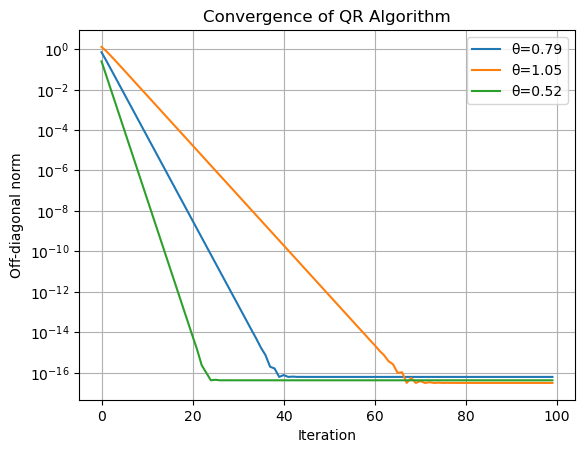

In [44]:
def track_convergence(A, max_iter=100):
    off_diag_norms = []
    A_k = A.copy()
    for _ in range(max_iter):
        Q, R = qr_decomp(A_k)
        A_k = R @ Q
        off_diag_norm = np.sum(np.abs(A_k - np.diag(np.diag(A_k))))
        off_diag_norms.append(off_diag_norm)
    return off_diag_norms

theta_vals = [np.pi/4, np.pi/3, np.pi/6]# Problem is for 0, and pi the matrix is rank deficient
off_diag_norms_list = []
for theta in theta_vals:
    A = np.array([
        [np.cos(theta), np.sin(theta)],
        [np.sin(theta), 0]
    ])
    off_diag_norms = track_convergence(A)
    off_diag_norms_list.append(off_diag_norms)
    plt.plot(off_diag_norms, label=f"θ={theta:.2f}")
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Off-diagonal norm')
plt.title('Convergence of QR Algorithm')
plt.legend()
plt.grid()
plt.show()

We can see in this plot how the QR-Algorithm converges for different values of $\theta$.

Again this better visualizes the dependence of the off diagonal elements. We see for some configurations for example $\theta = 1.05$ radiants we need much more iterations to reach a given tolerance, as for example $\theta = 0.52$ radiants

## Part 6)

For which values of $\theta$ is the QR decompositon unique?

Here i give a short proof on the uniqueness:

**Assumption** $A$ is full rank, this will then show the QR decomposition is unique if $r_{ii} >0$ for our matrix $R$

FOr this consider $A^TA$ since $A$ is full rank we have that $A^TA$ is positive definite from $A=QR$ we get

\begin{equation}
A^T A = R^T Q^T QR = R^T R
\end{equation}

We now denote $L=R^T$ now $L$ is a lower triangular matrix with positive entries onf the diagonal we have $A^TA = L^TL$ this is exactly the Cholesky decomposition of $A^TA$. We proofed in Numerical Math 1 that this is unique. But also $Q = A R^{-1}$ is unique of course $\square$

So we now check for invertability of $A$

\begin{equation}
A = \begin{pmatrix}
cos(\theta) & sin(\theta) \\
sin(\theta) & 0 
\end{pmatrix}
\end{equation}

The determinant of this matrix is given by $det(A) = cos(\theta) * 0 - sin^2(\theta) = -sin^2(\theta)$

So we have singularities if $\theta = 0$ or $\theta = \pi$. For all other values the matrix

As we have seen the $R$ matrix of the QR decompositon is given by

\begin{equation}
R = \begin{pmatrix}
1 & sin(\theta)cos(\theta) \\
0 & sin^2(\theta)
\end{pmatrix}
\end{equation}

which is positive in $(0, \pi)$

So for each value in $(0, \pi)$ we have a unique QR decomposition. For $\theta = 0$ or $\theta = \pi$ we have singularities and the QR decomposition is not unique.

